In [3]:
# Step 1: Load necessary libraries and the dataset 
# so we can understand the types of data we are working with
library(tidyverse)    
library(ggplot2)      
library(dplyr)        
library(readr)        
library(forcats)     
library(tidyr)        
library(purrr)


# Load the dataset
file_path <- "/home/jovyan/work/players.csv" 
players_df <- read_csv(file_path)

# View the first few rows 
head(players_df)
glimpse(players_df)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Rows: 196
Columns: 9
$ experience       <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "A…
$ subscribe        <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRU…
$ hashedEmail      <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee97…
$ played_hours     <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.…
$ name             <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Ad…
$ gender           <chr> "Male", "Male", "Male", "Female", "Male", "Female", "…
$ age              <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22…
$ individualId     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ organizationName <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


In [4]:
# Step 2: Remove empty columns and convert data types

players_df <- players_df %>%
  select(-individualId, -organizationName) %>% #remove unneeded columns
  mutate(
    experience = as.factor(experience), #convert all needed variables
    subscribe = as.logical(subscribe),
    gender = as.factor(gender),
    played_hours = as.numeric(played_hours)
  )

# Check the cleaned data
glimpse(players_df)

Rows: 196
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


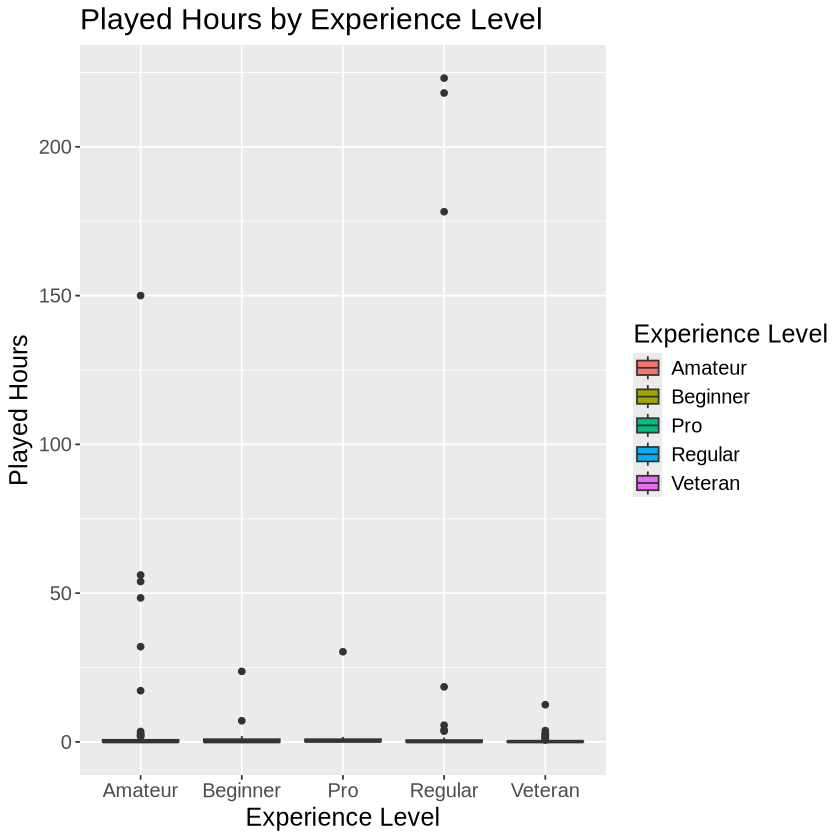

In [12]:
# Step 3: Plot Played Hours by Experience Level
ggplot(players_df, aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(
    title = "Played Hours by Experience Level",
    x = "Experience Level",
    y = "Played Hours",
    fill = "Experience Level"
  ) +
theme(text = element_text(size = 15))

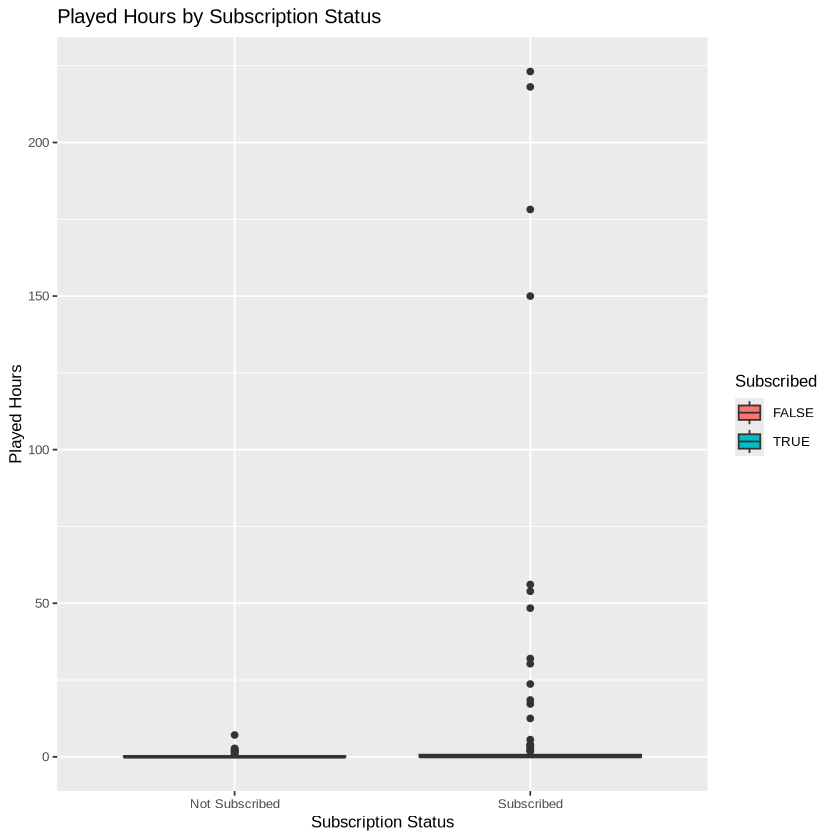

In [14]:
# Step 4: Plot Played Hours by Subscription Status
ggplot(players_df, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(
    title = "Played Hours by Subscription Status",
    x = "Subscription Status",
    y = "Played Hours",
    fill = "Subscribed"
  ) +
theme(text = element_text(size = 10))+
  scale_x_discrete(labels = c("Not Subscribed", "Subscribed")) 

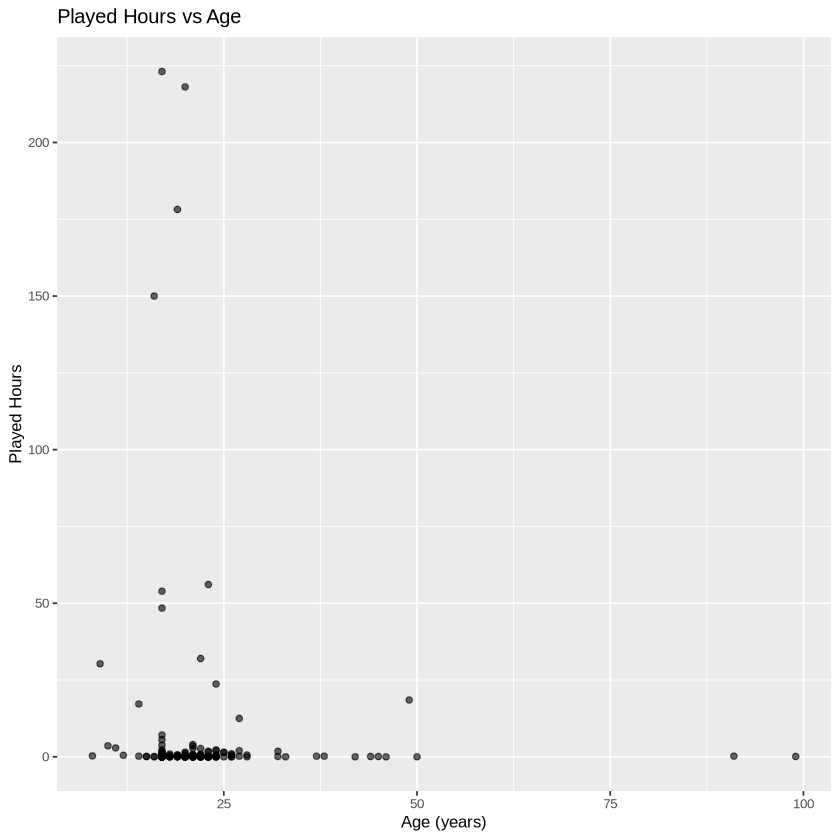

In [13]:
# Step 5: Scatter Plot of Played Hours vs Age
ggplot(players_df, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Played Hours vs Age",
    x = "Age (years)",
    y = "Played Hours"
  ) +
 theme(text = element_text(size = 10))